In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
df=sns.load_dataset('taxis')
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [4]:
df.dropna(inplace=True)
df.describe(include='object')
df.isnull().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

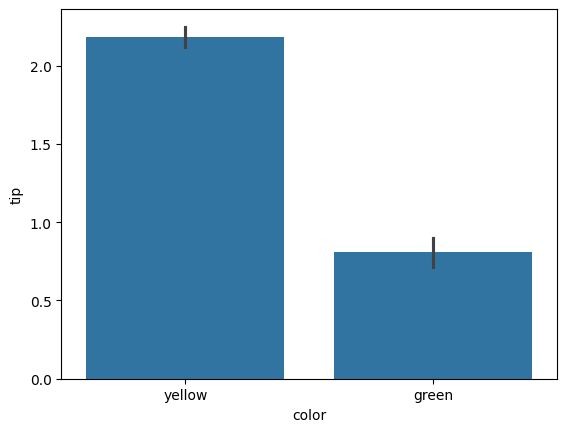

In [5]:
sns.barplot(x=df.color,y=df.tip,estimator='mean')
plt.show()

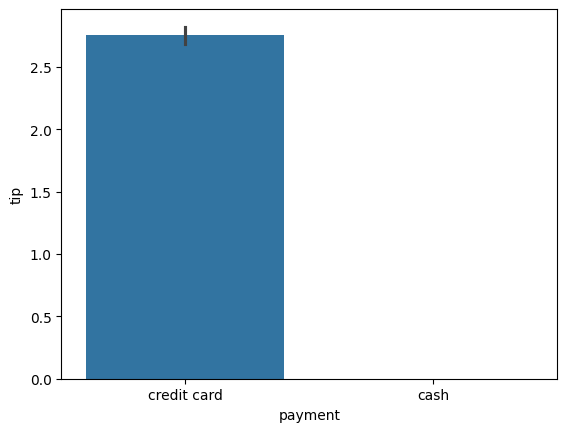

In [6]:
sns.barplot(x=df.payment,y=df.tip,estimator='mean')
plt.show()

In [7]:
# Independent T-Test
green_tip = df[df['color']=='green']['tip']
yellow_tip = df[df['color']=='yellow']['tip']
from scipy import stats
t_stat, p_val = stats.ttest_ind(green_tip, yellow_tip)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: Significant income difference by Taxi Color")
else:
    print("Fail to reject null hypothesis: No significant income difference by Taxi Color")

Independent T-Test statistic: -17.05932566128597
P-value: 7.791088119489453e-64
Reject null hypothesis: Significant income difference by Taxi Color


In [8]:
# Independent T-Test
credit_tip = df[df['payment']=='credit card']['tip']
cash_tip = df[df['payment']=='cash']['tip']
from scipy import stats
t_stat, p_val = stats.ttest_ind(credit_tip, cash_tip)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: Significant income difference by payment Method")
else:
    print("Fail to reject null hypothesis: No significant income difference by payment Method")

Independent T-Test statistic: 49.09538452722153
P-value: 0.0
Reject null hypothesis: Significant income difference by payment Method


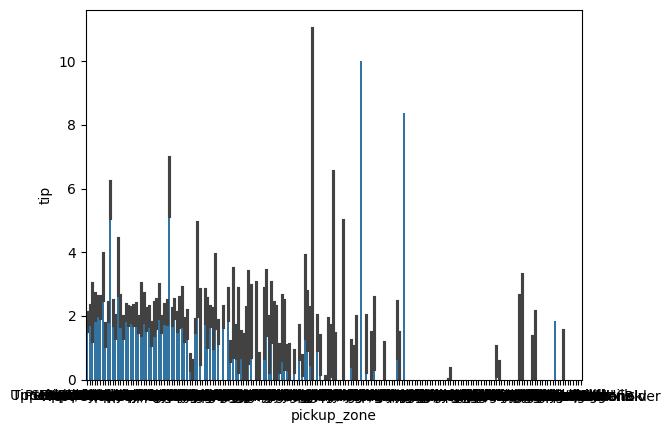

In [9]:
sns.barplot(x=df.pickup_zone,y=df.tip,estimator='mean')
plt.show()

In [10]:

manhattan_tip=df['tip'][df['dropoff_borough']=='Manhattan']
queens_tip=df['tip'][df['dropoff_borough']=='Queens']
bronx_tip=df['tip'][df['dropoff_borough']=='Bronx']
brooklyn_tip=df['tip'][df['dropoff_borough']=='Brooklyn']
staten_tip=df['tip'][df['dropoff_borough']=='Staten Island']
f_stat,p_val=stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip,staten_tip)
print(f_stat,p_val)

if(p_val<0.05):
  print("Reject null hypothesis: The tip distributions are different for atleast one dropoff_borough")
else:
  print("Fail to reject null hypothesis")

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_result=pairwise_tukeyhsd(endog=df['tip'],groups=df['dropoff_borough'],alpha=0.05)
print(tukey_result)

# ANOVA Test
regions = [group['tip'].values for name, group in df.groupby('pickup_zone')]
f_stat, p_val = stats.f_oneway(*regions)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")
# ANOVA Test
regions = [group['tip'].values for name, group in df.groupby('dropoff_zone')]
f_stat, p_val = stats.f_oneway(*regions)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")





31.42417796696829 5.87859571331583e-26
Reject null hypothesis: The tip distributions are different for atleast one dropoff_borough
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
    Bronx      Brooklyn   1.3869    0.0  0.7691  2.0046   True
    Bronx     Manhattan   1.4296    0.0  0.8751  1.9842   True
    Bronx        Queens   1.8873    0.0  1.2742  2.5005   True
    Bronx Staten Island  13.6303    0.0  9.0833 18.1773   True
 Brooklyn     Manhattan   0.0427 0.9952 -0.2571  0.3425  False
 Brooklyn        Queens   0.5004 0.0055  0.1026  0.8983   True
 Brooklyn Staten Island  12.2434    0.0  7.7204 16.7664   True
Manhattan        Queens   0.4577 0.0002  0.1675  0.7479   True
Manhattan Staten Island  12.2007    0.0  7.6859 16.7154   True
   Queens Staten Island   11.743    0.0  7.2206 16.2653   True
--------------------------------------------------

In [11]:
df.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [12]:
df.corr(numeric_only=True)


,passengers,distance,fare,tip,tolls,total
passengers,1.000000,0.005481,-0.000912,0.017838,-0.002885,0.008380
distance,0.005481,1.000000,0.947958,0.476980,0.642333,0.929224
fare,-0.000912,0.947958,1.000000,0.487101,0.617182,0.972311
tip,0.017838,0.476980,0.487101,1.000000,0.414670,0.650677
tolls,-0.002885,0.642333,0.617182,0.414670,1.000000,0.690879
total,0.008380,0.929224,0.972311,0.650677,0.690879,1.000000


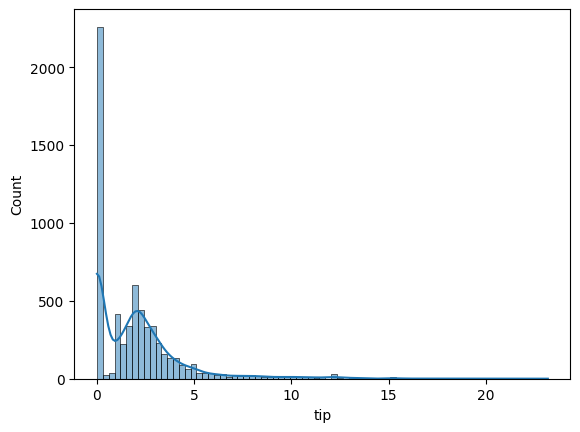

In [13]:
sns.histplot(df['tip'], kde=True)
plt.show()

C:\Users\VISHNU\AppData\Local\Temp\ipykernel_25376\2885418136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_borough',y='tip',data=df,estimator='mean',palette='Set2')
C:\Users\VISHNU\AppData\Local\Temp\ipykernel_25376\2885418136.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_borough',y='tip',data=df,estimator='std',palette='Set2')


Text(0.5, 1.0, 'Tip Distribution by Pickup Borough')

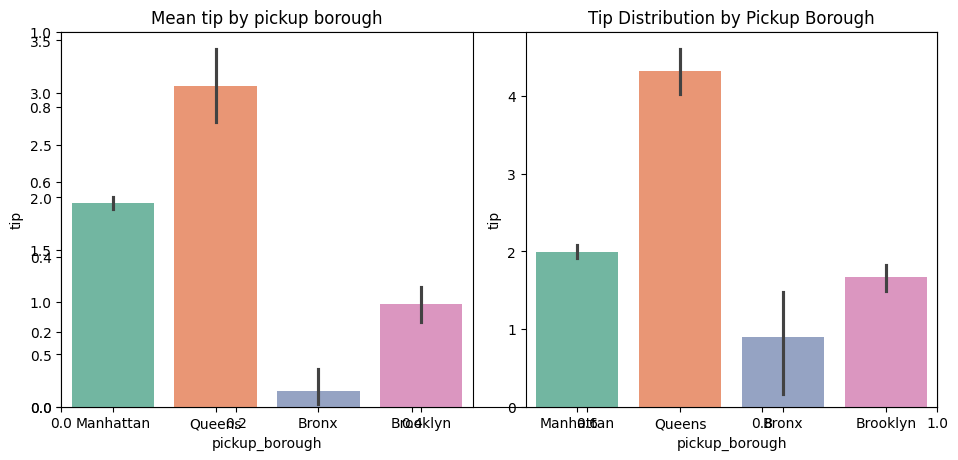

In [14]:

plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x='pickup_borough',y='tip',data=df,estimator='mean',palette='Set2')
plt.title('Mean tip by pickup borough')
plt.subplot(1,2,2)
sns.barplot(x='pickup_borough',y='tip',data=df,estimator='std',palette='Set2')
plt.title('Std tip by pickup borough')
plt.tight_layout()
plt.title('Tip Distribution by Pickup Borough')

<Axes: xlabel='tip', ylabel='Count'>

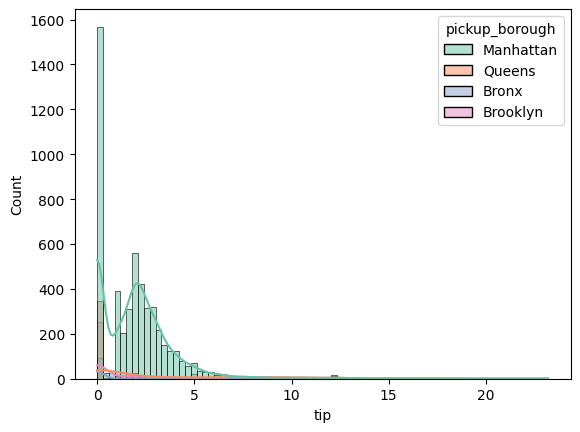

In [15]:

sns.histplot(x='tip',hue='pickup_borough',kde=True,data=df,palette='Set2')

<Axes: xlabel='pickup_borough', ylabel='tip'>

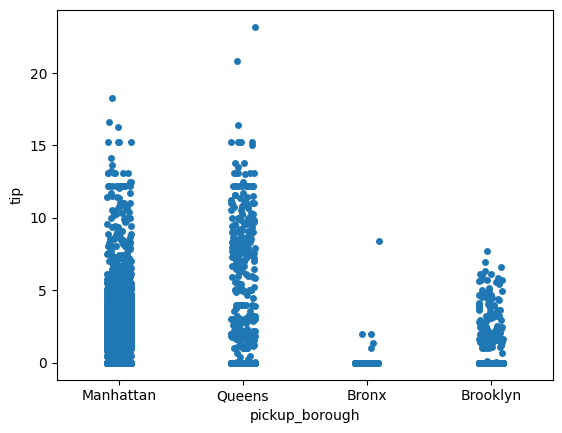

In [16]:
sns.stripplot(x='pickup_borough',y='tip',data=df)

C:\Users\VISHNU\AppData\Local\Temp\ipykernel_25376\3644113183.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.dropoff_borough,y=df.tip,palette='Set2')
C:\Users\VISHNU\AppData\Local\Temp\ipykernel_25376\3644113183.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.dropoff_borough,y=df.tip,estimator='std',palette='Set2')


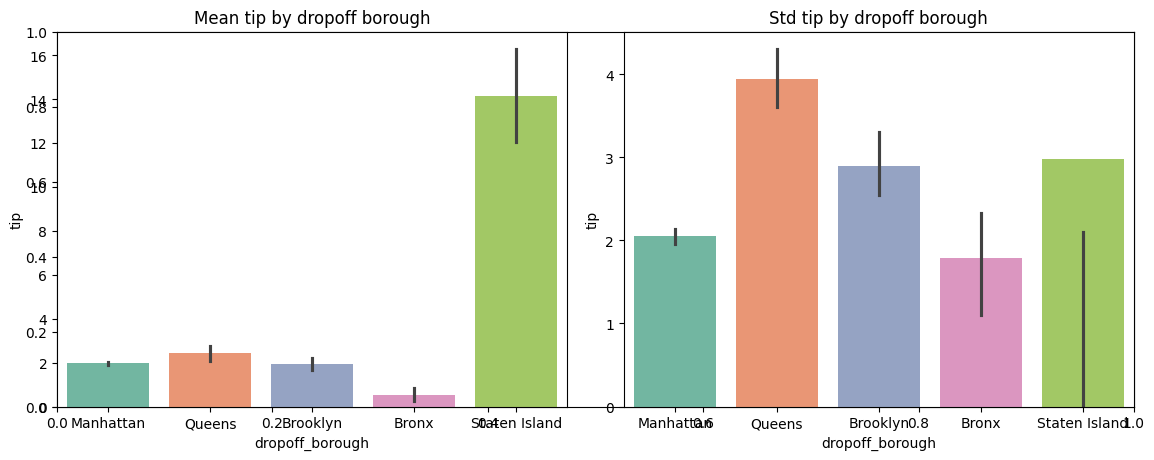

In [17]:

plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=df.dropoff_borough,y=df.tip,palette='Set2')
plt.title('Mean tip by dropoff borough')

plt.subplot(1,2,2)
sns.barplot(x=df.dropoff_borough,y=df.tip,estimator='std',palette='Set2')
plt.title('Std tip by dropoff borough')
plt.tight_layout()
plt.show()

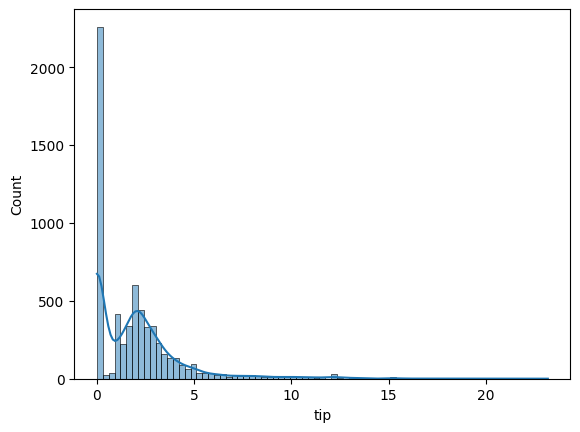

In [18]:
sns.histplot(df.tip,kde=True)
plt.show()
     

<Axes: xlabel='passengers', ylabel='Count'>

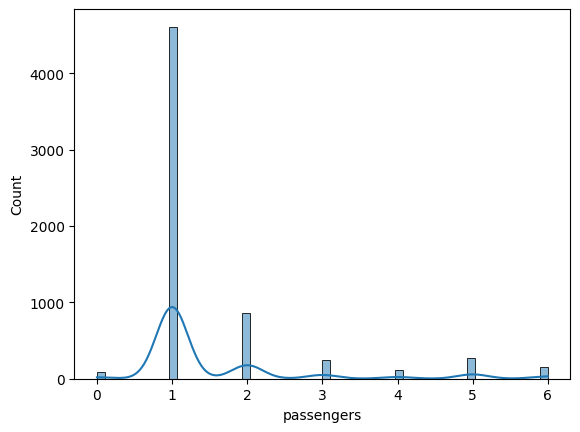

In [19]:

sns.histplot(df.passengers,kde=True)

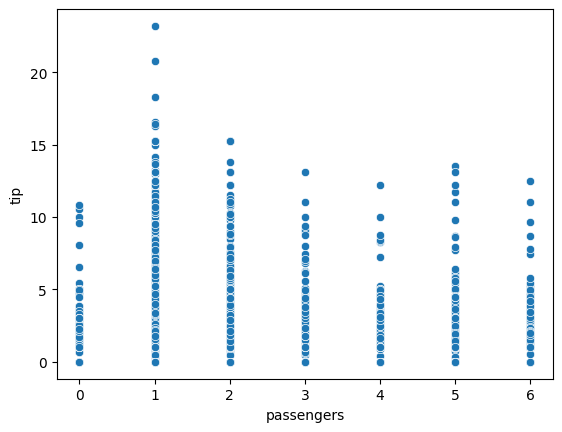

In [20]:
sns.scatterplot(x=df.passengers,y=df.tip)
plt.show()

In [21]:
df['passengers'].corr(df['tip'])

np.float64(0.0178382803613137)

In [22]:
r,p_val=stats.pearsonr(df.passengers,df.tip)
print(r,p_val)
alpha=0.05
if p_val<alpha:
    print("Reject null hypothesis: There is a correlation between passengers and tip")
else:
  print("Fail to reject null hypothesis")

0.017838280361313713 0.1555196950329863
Fail to reject null hypothesis


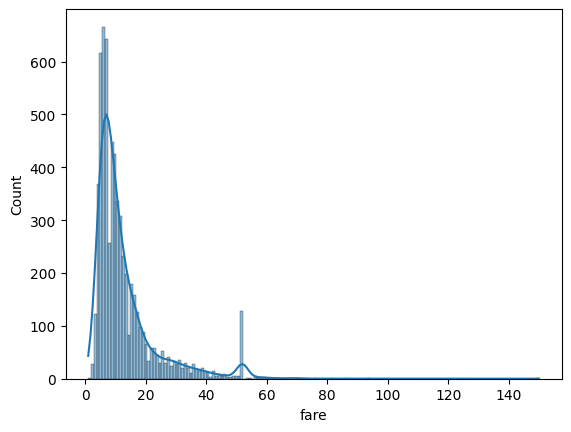

In [23]:

sns.histplot(df['fare'],kde=True)
plt.show()

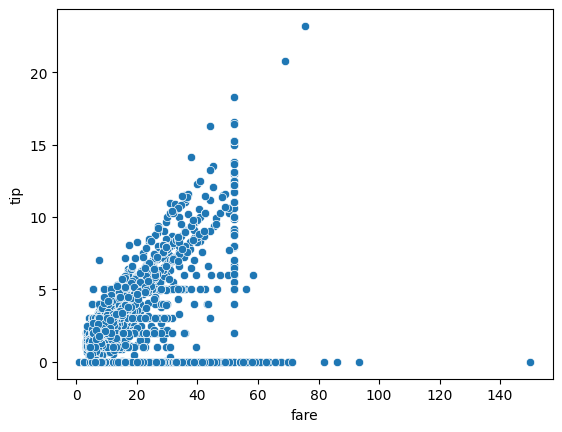

In [24]:
sns.scatterplot(x=df.fare,y=df.tip)
plt.show()

<Axes: xlabel='distance', ylabel='Count'>

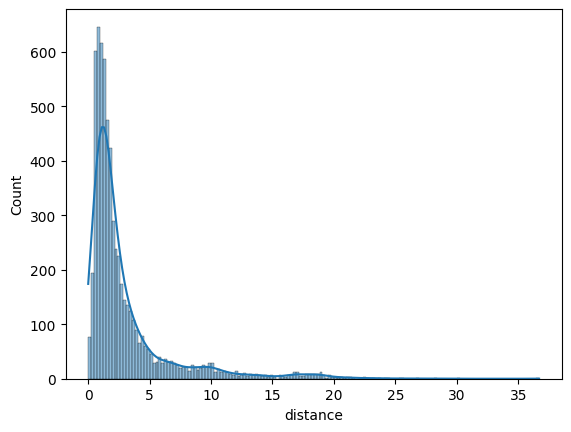

In [25]:
sns.histplot(df.distance,kde=True)

<Axes: xlabel='distance', ylabel='tip'>

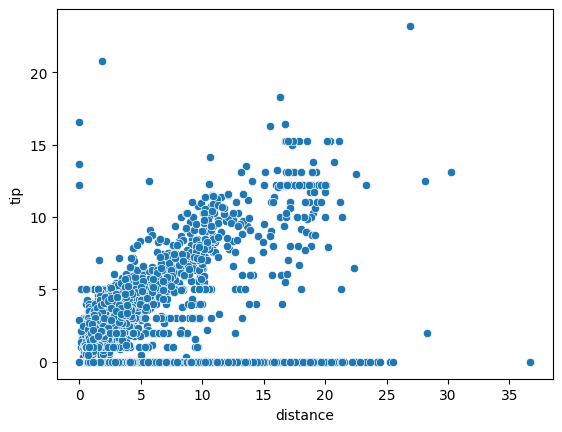

In [26]:
sns.scatterplot(x=df.distance,y=df.tip)

<Axes: xlabel='tolls', ylabel='Count'>

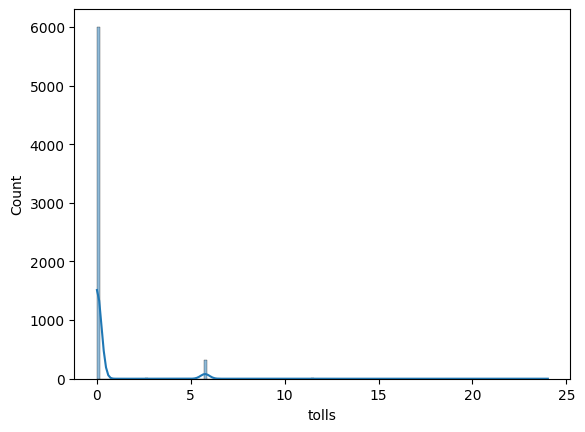

In [27]:
sns.histplot(df['tolls'],kde=True)

<Axes: xlabel='tolls', ylabel='tip'>

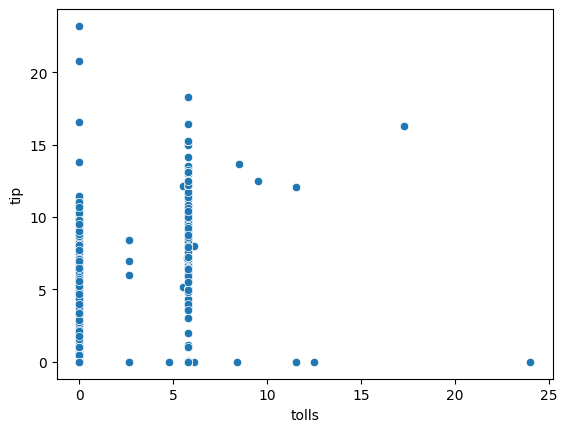

In [28]:
sns.scatterplot(x=df.tolls,y=df.tip)

<Axes: xlabel='total', ylabel='Count'>

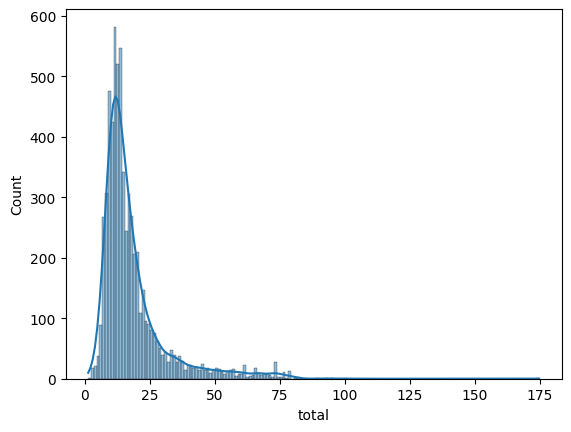

In [29]:

sns.histplot(df.total,kde=True)

<Axes: xlabel='total', ylabel='tip'>

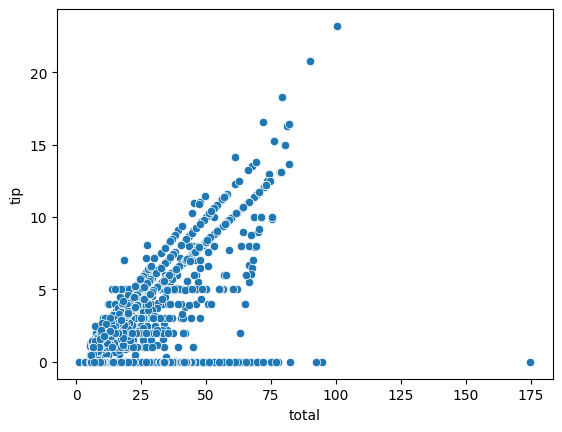

In [30]:

sns.scatterplot(x=df.total,y=df.tip)

<Axes: >

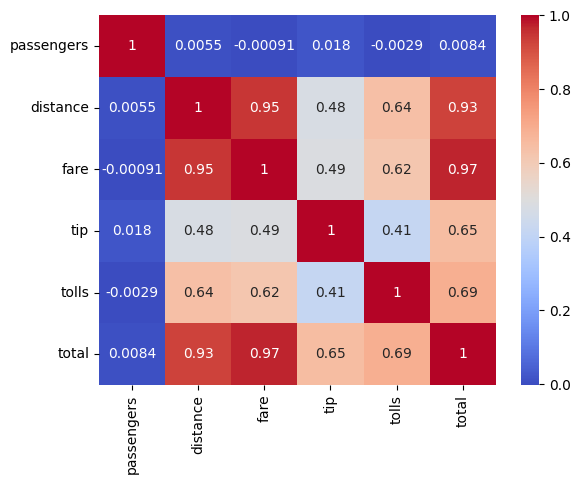

In [31]:

sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

<Axes: >

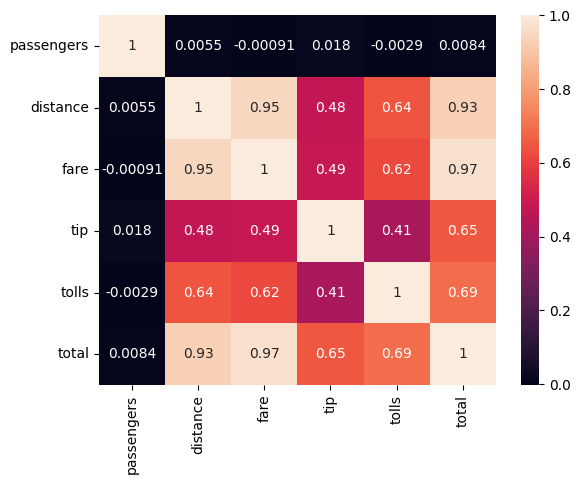

In [32]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

In [33]:
df['pickup_day']=df['pickup'].dt.day
df['pickup_month']=df['pickup'].dt.month
df['pickup_hour']=df['pickup'].dt.hour
df['pickup_year']=df['pickup'].dt.year
df.head(10)


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_day,pickup_month,pickup_hour,pickup_year
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,23,3,20,2019
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,4,3,16,2019
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,27,3,17,2019
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,10,3,1,2019
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,30,3,13,2019
5,2019-03-11 10:37:23,2019-03-11 10:47:31,1,0.49,7.5,2.16,0.0,12.96,yellow,credit card,Times Sq/Theatre District,Midtown East,Manhattan,Manhattan,11,3,10,2019
6,2019-03-26 21:07:31,2019-03-26 21:17:29,1,3.65,13.0,2.00,0.0,18.80,yellow,credit card,Battery Park City,Two Bridges/Seward Park,Manhattan,Manhattan,26,3,21,2019
8,2019-03-23 11:48:50,2019-03-23 12:06:14,1,3.63,15.0,1.00,0.0,19.30,yellow,credit card,East Harlem South,Midtown Center,Manhattan,Manhattan,23,3,11,2019
9,2019-03-08 16:18:37,2019-03-08 16:26:57,1,1.52,8.0,1.00,0.0,13.30,yellow,credit card,Lincoln Square East,Central Park,Manhattan,Manhattan,8,3,16,2019
10,2019-03-16 10:02:25,2019-03-16 10:22:29,1,3.90,17.0,0.00,0.0,17.80,yellow,cash,LaGuardia Airport,Astoria,Queens,Queens,16,3,10,2019


In [34]:
df['dropoff_day']=df['dropoff'].dt.day
df['dropoff_month']=df['dropoff'].dt.month
df['dropoff_year']=df['dropoff'].dt.year
df['dropoff_hour']=df['dropoff'].dt.hour
df['dropoff_minute']=df['dropoff'].dt.minute
df['dropoff_second']=df['dropoff'].dt.second
df['dropoff_quater']=df['dropoff'].dt.quarter
df.head(10)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,...,pickup_month,pickup_hour,pickup_year,dropoff_day,dropoff_month,dropoff_year,dropoff_hour,dropoff_minute,dropoff_second,dropoff_quater
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,...,3,20,2019,23,3,2019,20,27,24,1
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,...,3,16,2019,4,3,2019,16,19,0,1
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,...,3,17,2019,27,3,2019,18,0,25,1
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,...,3,1,2019,10,3,2019,1,49,51,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,...,3,13,2019,30,3,2019,13,37,14,1
5,2019-03-11 10:37:23,2019-03-11 10:47:31,1,0.49,7.5,2.16,0.0,12.96,yellow,credit card,...,3,10,2019,11,3,2019,10,47,31,1
6,2019-03-26 21:07:31,2019-03-26 21:17:29,1,3.65,13.0,2.00,0.0,18.80,yellow,credit card,...,3,21,2019,26,3,2019,21,17,29,1
8,2019-03-23 11:48:50,2019-03-23 12:06:14,1,3.63,15.0,1.00,0.0,19.30,yellow,credit card,...,3,11,2019,23,3,2019,12,6,14,1
9,2019-03-08 16:18:37,2019-03-08 16:26:57,1,1.52,8.0,1.00,0.0,13.30,yellow,credit card,...,3,16,2019,8,3,2019,16,26,57,1
10,2019-03-16 10:02:25,2019-03-16 10:22:29,1,3.90,17.0,0.00,0.0,17.80,yellow,cash,...,3,10,2019,16,3,2019,10,22,29,1


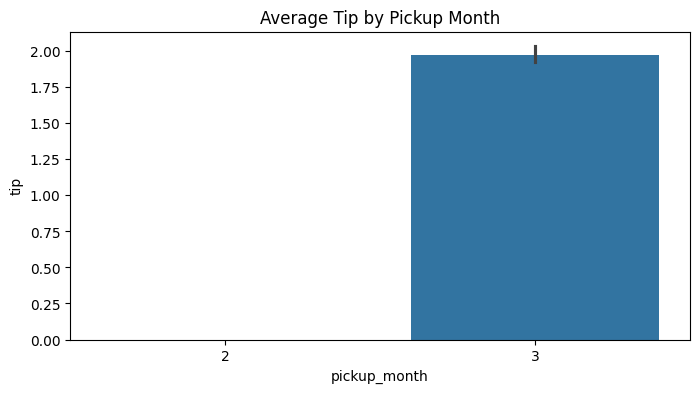

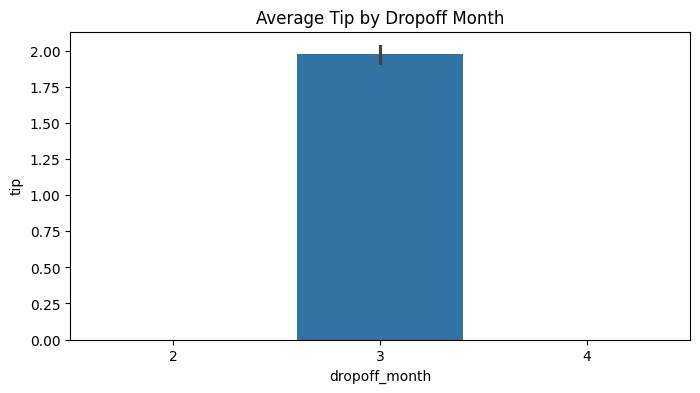

In [35]:
plt.figure(figsize=(8, 4))
sns.barplot(x=df.pickup_month, y=df.tip)
plt.title("Average Tip by Pickup Month")
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x=df.dropoff_month, y=df.tip)
plt.title("Average Tip by Dropoff Month")
plt.show()


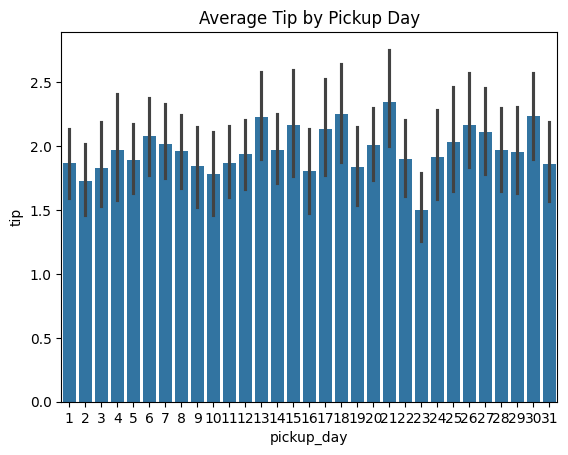

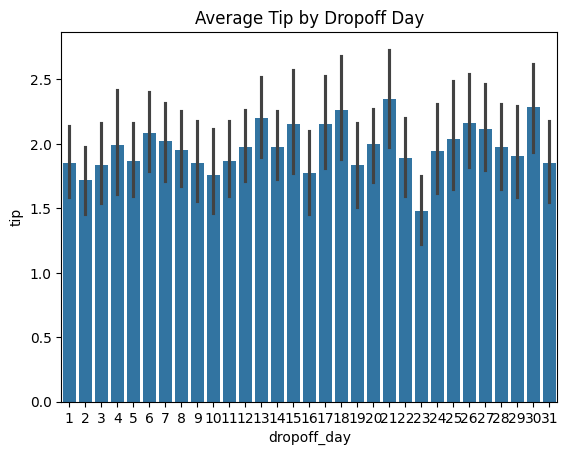

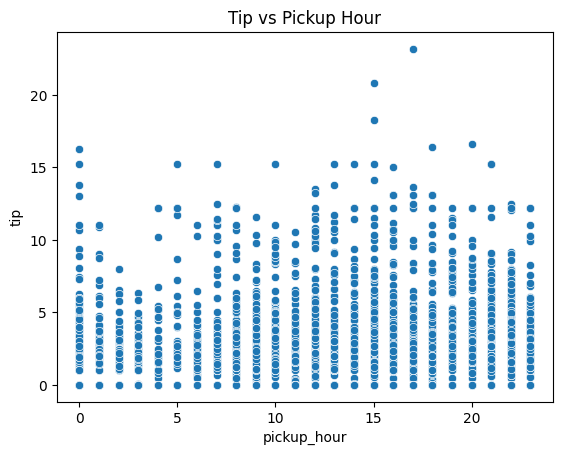

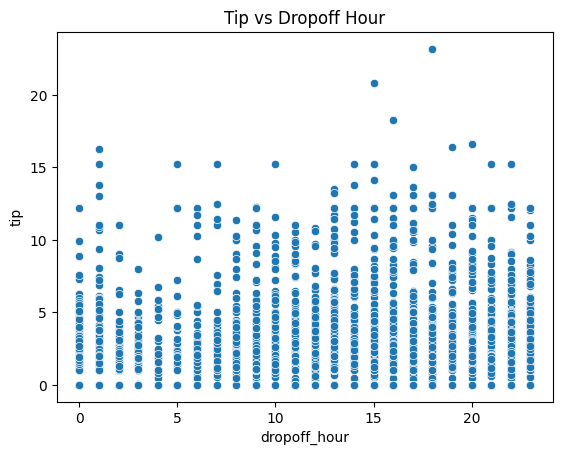

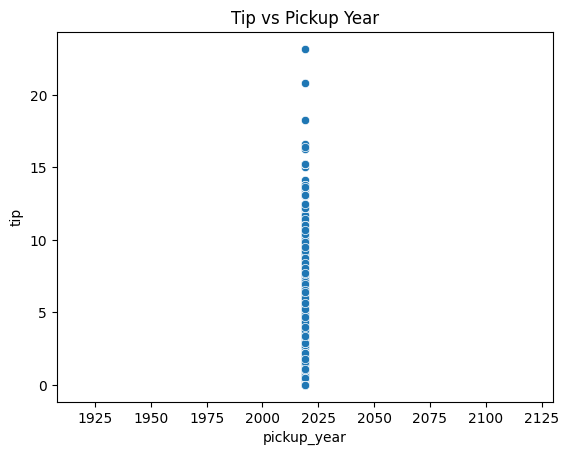

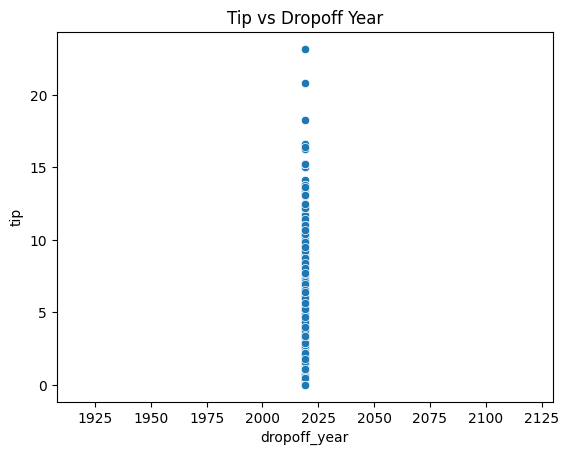

In [36]:
sns.barplot(x=df.pickup_day, y=df.tip)
plt.title("Average Tip by Pickup Day")
plt.show()
sns.barplot(x=df.dropoff_day, y=df.tip)
plt.title("Average Tip by Dropoff Day")
plt.show()
sns.scatterplot(x=df.pickup_hour,y=df.tip)
plt.title("Tip vs Pickup Hour")
plt.show()
sns.scatterplot(x=df.dropoff_hour,y=df.tip)
plt.title("Tip vs Dropoff Hour")
plt.show()
sns.scatterplot(x=df.pickup_year,y=df.tip)
plt.title("Tip vs Pickup Year")
plt.show()
sns.scatterplot(x=df.dropoff_year,y=df.tip)
plt.title("Tip vs Dropoff Year")
plt.show()

In [37]:
print(df['pickup_day'].kurtosis())
print(df['pickup_day'].skew())

-1.1765713733562717
0.04994570013687315


In [38]:
r,p_val=stats.spearmanr(df['pickup_day'],df['tip'])
print(r,p_val)
if p_val<0.05:
    print("Reject null hypothesis: There is a correlation between pickup day and tip")
else:
    print("Fail to reject null hypothesis")

0.00999688489379292 0.42607920373413977
Fail to reject null hypothesis


In [39]:
print(df['dropoff_day'].kurtosis())
print(df['dropoff_day'].skew())

-1.1763875279781784
0.050247468887452844


In [40]:
r,p_val=stats.spearmanr(df['dropoff_day'],df['tip'])
print(r,p_val)
if p_val<0.05:
    print("Reject null hypothesis: There is a correlation between dropoff day and tip")
else:
    print("Fail to reject null hypothesis")

0.010829999394669469 0.38854863611464274
Fail to reject null hypothesis


In [41]:
print(df['dropoff_hour'].kurtosis())
print(df['dropoff_hour'].skew())

-0.5194809457514951
-0.5121914858347444


In [42]:
r,p_val=stats.pearsonr(df['dropoff_hour'],df['tip'])
print(r,p_val)
if p_val<0.05:
    print("Reject null hypothesis: There is a correlation between dropoff hour and tip")
else:
    print("Fail to reject null hypothesis")

0.032402365560439024 0.009869106785629042
Reject null hypothesis: There is a correlation between dropoff hour and tip


In [43]:
print(df['pickup_hour'].kurtosis())
print(df['pickup_hour'].skew())

-0.5336286870692848
-0.48079237828578225


In [44]:
r,p_val=stats.pearsonr(df['pickup_hour'],df['tip'])
print(r,p_val)
if p_val<0.05:
    print("Reject null hypothesis: There is a correlation between dropoff day and tip")
else:
    print("Fail to reject null hypothesis")

0.026615033651540543 0.034063158905884315
Reject null hypothesis: There is a correlation between dropoff day and tip


In [45]:
print(df['dropoff_minute'].kurtosis())
print(df['dropoff_minute'].skew())

-1.1896281986842923
-0.019218697392573317


In [46]:
r,p_val=stats.spearmanr(df['dropoff_minute'],df['tip'])
print(r,p_val)
if p_val<0.05:
    print("Reject null hypothesis: There is a correlation between dropoff minute and tip")
else:
    print("Fail to reject null hypothesis")

-0.0067821569040467196 0.5892207712099395
Fail to reject null hypothesis


In [47]:
print(df['dropoff_second'].kurtosis())
print(df['dropoff_second'].skew())

-1.1902322051756942
-0.002813195253671533


In [48]:
r,p_val=stats.spearmanr(df['dropoff_second'],df['tip'])
print(r,p_val)
if p_val<0.05:
    print("Reject null hypothesis: There is a correlation between dropoff second and tip")
else:
    print("Fail to reject null hypothesis")

-0.001584000947940426 0.8996449823973446
Fail to reject null hypothesis


In [49]:
df.drop(['pickup','dropoff','pickup_year','dropoff_year','dropoff_minute','dropoff_second','dropoff_quater','dropoff_day','dropoff_quater'],axis=1,inplace=True)
df.shape
df.dtypes
df.head(5)

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_day,pickup_month,pickup_hour,dropoff_month,dropoff_hour
0,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,23,3,20,3,20
1,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,4,3,16,3,16
2,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,27,3,17,3,18
3,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,10,3,1,3,1
4,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,30,3,13,3,13


In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['color']=le.fit_transform(df['color'])
df['payment']=le.fit_transform(df['payment'])
df['dropoff_borough']=le.fit_transform(df['dropoff_borough'])
df['pickup_borough']=le.fit_transform(df['pickup_borough'])
df['pickup_zone']=le.fit_transform(df['pickup_zone'])
df['dropoff_zone']=le.fit_transform(df['dropoff_zone'])
df.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_day,pickup_month,pickup_hour,dropoff_month,dropoff_hour
0,1,1.60,7.0,2.15,0.0,12.95,1,1,99,176,2,2,23,3,20,3,20
1,1,0.79,5.0,0.00,0.0,9.30,1,0,174,182,2,2,4,3,16,3,16
2,1,1.37,7.5,2.36,0.0,14.16,1,1,1,190,2,2,27,3,17,3,18
3,1,7.70,27.0,6.15,0.0,36.95,1,1,86,202,2,2,10,3,1,3,1
4,3,2.16,9.0,1.10,0.0,13.40,1,1,116,202,2,2,30,3,13,3,13


In [51]:
df.drop(['pickup_day','pickup_month','dropoff_month'],axis=1,inplace=True)
df.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_hour,dropoff_hour
0,1,1.60,7.0,2.15,0.0,12.95,1,1,99,176,2,2,20,20
1,1,0.79,5.0,0.00,0.0,9.30,1,0,174,182,2,2,16,16
2,1,1.37,7.5,2.36,0.0,14.16,1,1,1,190,2,2,17,18
3,1,7.70,27.0,6.15,0.0,36.95,1,1,86,202,2,2,1,1
4,3,2.16,9.0,1.10,0.0,13.40,1,1,116,202,2,2,13,13


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
X=df.drop('tip',axis=1)
y=df['tip']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)



In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.4206158611342271
Mean Squared Error: 0.39431943854899104
Root Mean Squared Error: 0.6279485954670104
R-squared: 0.9252191387301998


In [54]:
from sklearn.preprocessing import PolynomialFeatures
degree=[i for i in range(1,5)]
models=[LinearRegression() for _ in degree]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
for d in degree:
    poly=PolynomialFeatures(degree=d)
    X_train1=poly.fit_transform(X_train)
    X_test1=poly.transform(X_test)
    models[degree.index(d)].fit(X_train1,y_train)
    y_pred=models[degree.index(d)].predict(X_test1)
    r2=r2_score(y_test,y_pred)
    print(f"Degree: {d}, R-squared: {r2}")

Degree: 1, R-squared: 0.9252191387301965
Degree: 2, R-squared: 0.9571804749769985
Degree: 3, R-squared: 0.560685778864124
Degree: 4, R-squared: -23812.071937728608


In [ ]:
# plt.figure(figsize=(10,6))
# plt.scatter(X,y,color='blue')
# plt.plot(X,models[1].predict(PolynomialFeatures(degree=2).fit_transform(X)),color='red')

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>